In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', **{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from iminuit import Minuit

# Chew-Frantschi

## Exp values

In [2]:
data = {}
data['pi'] = {'J': np.array([0, 1, 2]),\
              'M': np.array([0.1349770, 1.2295, 1.6722]),\
              'E': np.array([0.0000005, 0.0032, 0.0030])}
data['rho'] = {'J': np.array([1, 2, 3, 4, 5, 6]),\
               'M': np.array([0.775, 1.3183, 1.6888, 1.995, 2.330, 2.450]),
               'E': np.array([0.00025, 0.0005, 0.0021, 0.010, 0.035, 0.130])}
data['omega'] = {'J': np.array([1, 2, 3, 4, 6]),\
                 'M': np.array([0.78265, 1.2755, 1.667, 2.018, 2.469]),\
                 'E': np.array([0.00012, 0.0008, 0.004, 0.011, 0.029])}
data['phi'] = {'J': np.array([1, 2, 3]),\
               'M': np.array([1.019461, 1.525, 1.854]),\
               'E': np.array([0.000016, 0.005, 0.007])}

## Functions

In [3]:
def alphat(t, ap, a0):
    return a0 + ap * t

## Fit

In [15]:
def chi2(par):
    kappa, a0pi, a0rho, a0omega, a0phi = par[0], par[1], par[2], par[3], par[4]
    ap = 1.0 / (4.0 * kappa**2)
    thypi = (np.array([0, 1, 2]) - a0pi) / ap
    thyrho = (np.array([1, 2, 3, 4]) - a0rho) / ap
    thyomega = (np.array([1, 2, 3, 4]) - a0omega) / ap
    thyphi = (np.array([1, 2, 3]) - a0phi) / ap
    result =  0 * np.sum((thypi - data['pi']['M'][:3] ** 2) ** 2)\
            + np.sum((thyrho - data['rho']['M'][:4] ** 2) ** 2) \
            + np.sum((thyomega - data['omega']['M'][:4] ** 2) ** 2) \
            + 0 * np.sum((thyphi - data['phi']['M'][:3] ** 2) ** 2)
    return result

In [16]:
minCF = Minuit.from_array_func(chi2, (0.533662, -0.0159928, 0.5-0.0159928, 0.5-0.0159928, 0.5),\
                               name = ('kappa', 'a0pi', 'a0rho', 'a0omega', 'a0phi'),\
                               error = (0.001, 0.001, 0.001, 0.001, 0.001),\
                               fix = (False, True, False, False, True),\
                               limit = ((None, None), (None, None), (None, None), (None, None), (None, None)),\
                               errordef = 1)

In [17]:
minCF.tol = 1e-6
fmin, par = minCF.migrad(ncall=10000)

FCN = 0.0215078260307 
 TOTAL NCALL = 60 
 NCALLS = 60 
 
 
 EDM = 1.79212287612e-12 
 GOAL EDM = 1e-10 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,kappa,0.533663,0.0740643,,,,,No
1,a0pi,-0.0159928,0.001,,,,,Yes
2,a0rho,0.487459,0.710411,,,,,No
3,a0omega,0.505006,0.706588,,,,,No
4,a0phi,0.5,0.001,,,,,Yes


In [68]:
da0 = 0.1349770**2 / (4.0 * minCF.values['kappa']**2)
da0

0.015992891551016814

## plot

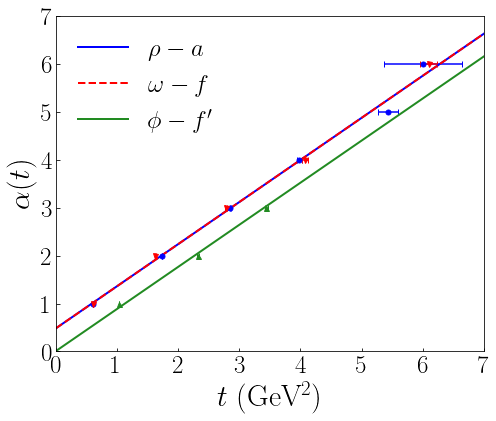

In [71]:
nrows, ncols = 1, 1

fig = plt.figure(figsize = (ncols * 7, nrows * 7 * 0.85))

at = 1.0 / (4.0 * minCF.values['kappa']**2)
a0pi = 0 - da0
a0rho = a0omega = 0.5 - da0
a0phi = 0.00960965

ax = fig.add_subplot(nrows, ncols, 1)
#ax.errorbar(data['pi']['M'] ** 2, data['pi']['J'], xerr = 2.0 * data['pi']['M'] * data['pi']['E'],\
#           marker = 'o', markersize = 5, linestyle = '', color = 'black', capsize = 3)
ax.errorbar(data['rho']['M'] ** 2, data['rho']['J'], xerr = 2.0 * data['rho']['M'] * data['rho']['E'],\
           marker = 'o', markersize = 5, linestyle = '', color = 'blue', capsize = 3)
ax.errorbar(data['omega']['M'] ** 2, data['omega']['J'], xerr = 2.0 * data['omega']['M'] * data['omega']['E'],\
           marker = 'v', markersize = 5, linestyle = '', color = 'red', capsize = 3)
ax.errorbar(data['phi']['M'] ** 2, data['phi']['J'], xerr = 2.0 * data['phi']['M'] * data['phi']['E'],\
           marker = '^', markersize = 5, linestyle = '', color = 'forestgreen', capsize = 3)
t = np.linspace(0,7,50)
#c0 = ax.plot(t, alphat(t, at, a0pi), linestyle = '-', linewidth = 2, color = 'gray')
c1 = ax.plot(t, alphat(t, at, a0rho), linestyle = '-', linewidth = 2, color = 'blue')
c2 = ax.plot(t, alphat(t, at, a0omega), linestyle = '--', linewidth = 2, color = 'red')
c3 = ax.plot(t, alphat(t, at, a0phi), linestyle = '-', linewidth = 2, color = 'forestgreen')
ax.set_xlim(0,7)
ax.set_ylim(0,7)
ax.set_xlabel(r'$t~\rm (GeV^2)$', size = 30)
ax.set_ylabel(r'$\alpha(t)$', size = 30)
ax.set_xticks(range(8))
ax.set_yticks(range(8))
ax.tick_params(axis = 'both', which = 'both', direction = 'in', labelsize = 25)
L = [(c1[0]), (c2[0]), (c3[0])]
H = [r'$\rho-a$', r'$\omega-f$', r"$\phi-f'$"]
ax.legend(L, H, frameon = False, loc = 'upper left', fontsize = 25)

fig.tight_layout()
fig.savefig('plots/trajectories.pdf')